### imports etc.

In [1]:
#Note: there are some new imports here!
import os 
import numpy as np
import pickle
from helpers.SimulationAnalysis import SimulationAnalysis, readHlist
import matplotlib.pylab as plt
import pynbody
import meshoid
from meshoid import Meshoid
import seaborn as sns
import matplotlib.colors as colors

#......new imports (helper class)
import sys
sys.path.insert(0, '../scripts') # adding to the system path
from hlistHelper import hlist

%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
plt.rc("text", usetex=True)
custom_blues_complement = ["#FFBB99", "#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200","#000000"]

%matplotlib inline
%config InlineBackend.figure_format='retina'
%config InlineBackend.rc = {'figure.facecolor': 'w'}
custom_blues = ["#99DDFF","#66CCFF", "#33BBFF", "#00AAFF", "#0088CC", "#006699", "#004466", "#000000"]
custom_blues_complement = ["#FFBB99", "#FF9966", "#FF7733", "#FF5500", "#CC4400", "#993300", "#662200","#000000"]
custom_cet_fdm = ["#EE99FF","#E566FF","#DD33FF","#D400FF","#AA00CC","#7F0099"]
#["#fc5eff","#e330ff","#b11eff"]

sim_colors = {}
sim_colors['cdm'] = 'k'
sim_colors['vd100'] = 'm'
sim_colors['wdm_3.5'] = custom_blues_complement[1]
sim_colors['wdm_6.5'] = custom_blues_complement[4]
sim_colors['Tkd_0.72kev'] = 'teal'
sim_colors['Tkd_0.72kev_vd100'] = 'teal'
sim_colors['Tkd_1.46kev'] = 'goldenrod'
sim_colors['Tkd_1.46kev_vd100'] = 'goldenrod'
sim_colors['Tkd_2.32kev'] = 'brown'
sim_colors['Tkd_2.32kev_vd100'] = 'brown'

sim_colors['wdm_3'] = custom_blues_complement[0]
sim_colors['wdm_4'] = custom_blues_complement[1]
sim_colors['wdm_5'] = custom_blues_complement[2]
sim_colors['wdm_6'] = custom_blues_complement[3]
sim_colors['wdm_6.5'] = custom_blues_complement[4]
sim_colors['wdm_10'] = custom_blues_complement[5]
sim_colors['idm_1e-4GeV'] = custom_blues[0]
sim_colors['idm_1e-2GeV'] = custom_blues[2]
sim_colors['idm_1GeV'] = custom_blues[4]
sim_colors['fdm_25.9e-22eV'] = custom_cet_fdm[0]
sim_colors['fdm_69.4e-22eV'] = custom_cet_fdm[1]
sim_colors['fdm_113e-22eV'] = custom_cet_fdm[2]
sim_colors['fdm_151e-22eV'] = custom_cet_fdm[3]
sim_colors['fdm_185e-22eV'] = custom_cet_fdm[4]
sim_colors['fdm_490e-22eV'] = custom_cet_fdm[5]

### from week 7 notebook

In [2]:
BASE_PATH = '/central/groups/carnegie_poc/enadler/ncdm_resims/'

halo_num = 'Halo004/'
model = 'cdm/'

print(os.listdir(BASE_PATH+halo_num+model+'output/rockstar/trees/'))

['tree_0_0_0.dat', 'forests.list', 'locations.dat']


In [3]:
#Define simulation object
sim = SimulationAnalysis(trees_dir=BASE_PATH+halo_num+model+'output/rockstar/trees')

#Load hlist at z = 0
halos = readHlist(BASE_PATH+halo_num+model+'output/rockstar/hlists/hlist_1.00000.list')

#Load main branch of most massive halo
most_massive_halo = halos[np.argmax(halos['Mvir'])]
host = most_massive_halo
host_main_branch = sim.load_main_branch(most_massive_halo['id'])

In [4]:
#Find subhalos of the host at z = 0
subhalos = halos[halos['upid']==host['id']]

#Load main branch of most massive subhalo
most_massive_sub = subhalos[np.argmax(subhalos['Mvir'])]
sub_main_branch = sim.load_main_branch(most_massive_sub['id'])

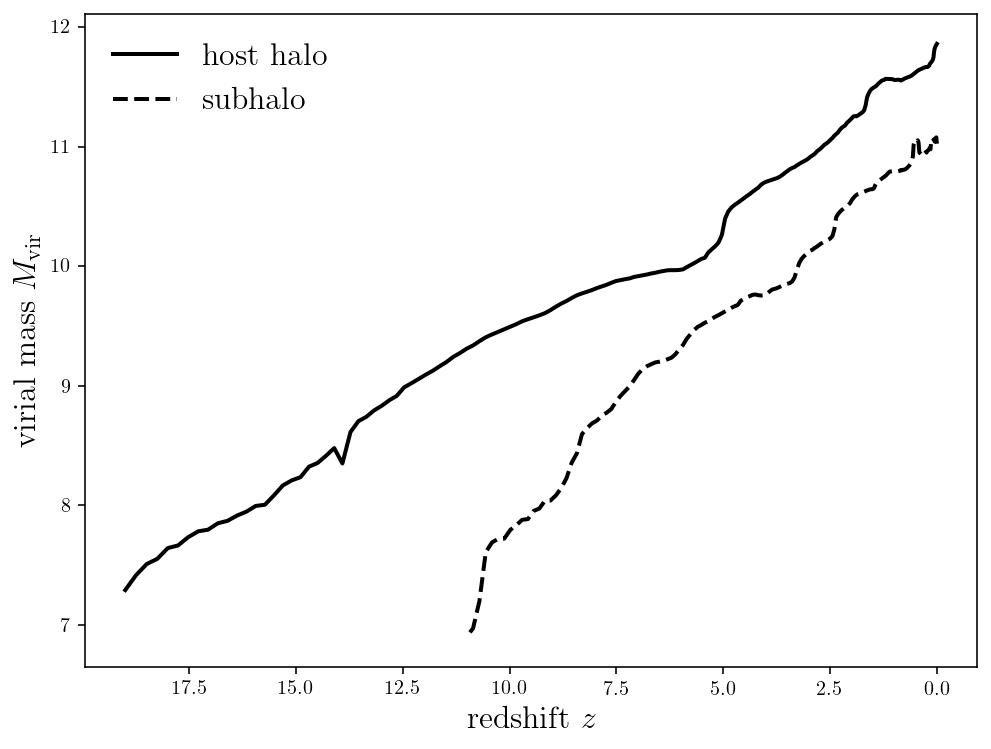

In [5]:
#Plot mass accretion history
plt.figure(figsize=(8,6))

redshift = 1./host_main_branch['scale'] - 1.
mass_accretion_history = np.log10(host_main_branch['mvir'])

plt.plot(redshift,mass_accretion_history,lw=2,c=sim_colors['cdm'],label=r'$\mathrm{host\ halo}$')

###

redshift = 1./sub_main_branch['scale'] - 1.
mass_accretion_history = np.log10(sub_main_branch['mvir'])

plt.plot(redshift,mass_accretion_history,lw=2,c=sim_colors['cdm'],ls='--',label=r'$\mathrm{subhalo}$')

###

plt.xlabel(r'$\mathrm{redshift\ } z$',fontsize=16)
plt.ylabel(r'$\mathrm{virial\ mass\ } M_{\mathrm{vir}}$',fontsize=16)
plt.legend(loc=2,fontsize=16,frameon=False)

plt.gca().invert_xaxis()
plt.show()

### new: looking at subhalo evolution

for a given mass bin?? similar to how we mapped the relative number evolution